1.   a) Can you perform a simple linear regression (from scratch) analysis to determine if there is a relationship between the phone's  pixel density and its rating using line search approach?
      b) What is the slope and intercept of the regression line, and what is the Mean Squared Error (MSE) for this model?
      c) Plot Cost function (both as surface as well as contour) and best fit line.

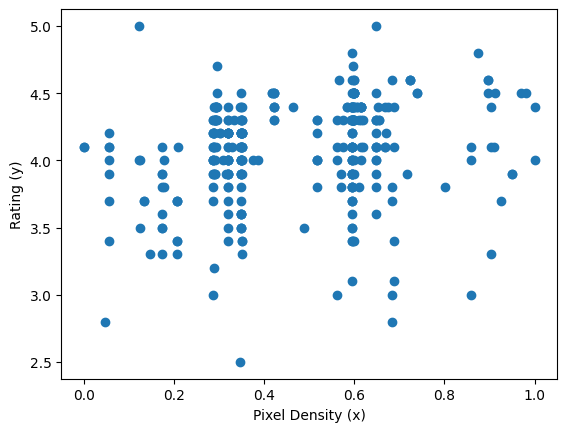

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("mobile_data (1).csv")
df=df.fillna(0)
pixden=df['Pixel Density'].tolist()
rating=df['Rating'].tolist()
ratmax=(max(rating))
pixmax=max(pixden)
pixmin=min(pixden)
m=len(rating)
for i in range(m):
 pixden[i]=(pixden[i]-pixmin)/(pixmax-pixmin)
plt.scatter(pixden,rating)
plt.xlabel("Pixel Density (x)")
plt.ylabel("Rating (y)")
plt.show()



In [19]:
 # initial values 
def hypothesis(w,x):
    return w[0]+w[1]*x

def cost_func(w):
  cost=0
  for i in range(m):
     cost=cost+(1/(2*m))*((hypothesis(w,pixden[i])-rating[i])**2)
  return cost
def gradient(w):
   grad=[0,0]
   for i in range(m):
      grad[0]=grad[0]+(1/m)*(hypothesis(w,pixden[i])-rating[i])
      grad[1]=grad[1]+((1/m)*(hypothesis(w,pixden[i])-rating[i]))*pixden[i]
   return grad


In [23]:
w=[0,1]
e=0.0001
xpoints=[w[0]]
ypoints=[w[1]]
while(np.linalg.norm(gradient(w))>e):
 a=0.1
 b=0.5
 n=50
 delta=(b-a)/n
 alpha1=a
 alpha2=alpha1+delta
 alpha3=alpha2+delta
 while alpha3<=b:
    direction=np.array([-1*gradient(w)[0],-1*gradient(w)[1]])
    if (cost_func(w+[alpha1*direction]))>=cost_func(w+[alpha2*direction])<=cost_func(w+[alpha3*direction]):
        break
    else:
        alpha1=alpha2
        alpha2=alpha3
        alpha3=alpha2+delta
  
 wm=(alpha1+alpha3)/2
 L=alpha3-alpha1
 y1=alpha1+L/4
 y2=alpha3-L/4
 while abs(L)>e:
  if cost_func(w+[w[0]*direction])<cost_func(w+[wm*direction]):
      alpha3=wm
      wm=y1
      L=alpha3-alpha1
      y1=alpha1+L/4
      y2=alpha3-L/4
      
  else:
      if cost_func(w+[w[1]*direction])<cost_func(w+[wm*direction]):
       alpha1=wm
       wm=y2
       L=alpha3-alpha1
       y1=alpha1+L/4
       y2=alpha3-L/4
       
       
      else:
         alpha1=y1
         alpha3=y2
         L=alpha3-alpha1
         y1=alpha1+L/4
         y2=alpha3-L/4
 alpha_avg=(alpha1+alpha3)/2
 w[0]=w[0]-alpha_avg*gradient(w)[0]
 w[1]=w[1]-alpha_avg*gradient(w)[1]
 xpoints.append(w[0])
 ypoints.append(w[1])
 

print("Mean squared error J(w1,w2)= ",cost_func(w))
print("intercept,slope=",w)



Mean squared error J(w1,w2)=  0.06757052275747906
intercept,slope= [3.885162579698003, 0.40290706348283417]


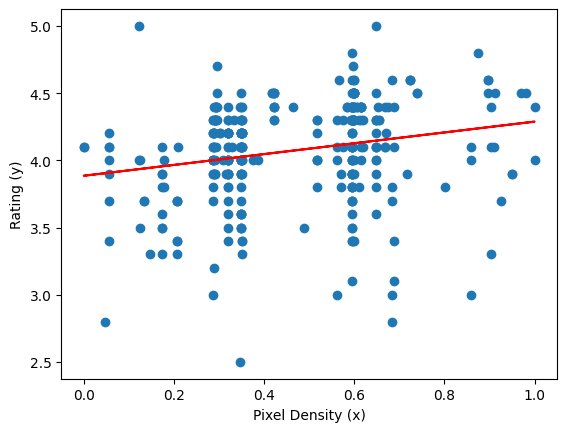

In [21]:
plt.scatter(pixden,rating)
plt.xlabel("Pixel Density (x)")
plt.ylabel("Rating (y)")
pixdens=np.array(pixden)
x1points=np.array(xpoints)
y1points=np.array(ypoints)

plt.plot(pixdens,hypothesis(w,pixdens),'red')
plt.show()


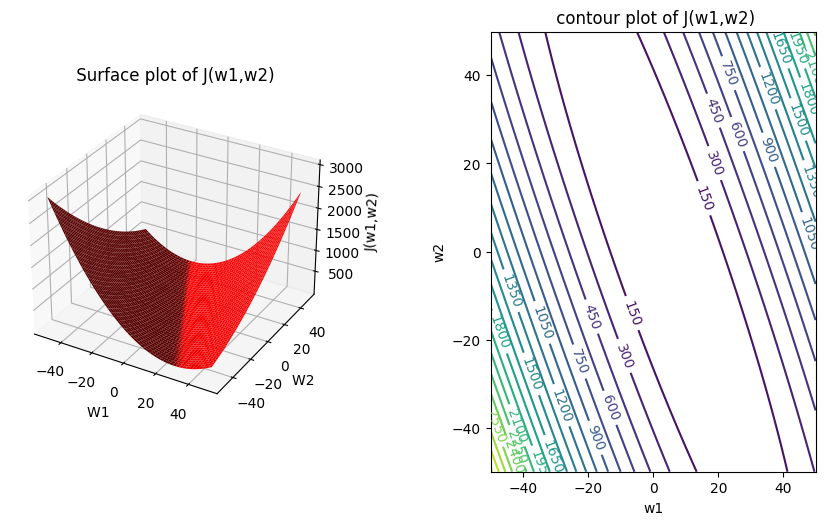

In [22]:
 w[0]=np.arange(-50.0,50.0,0.1)
 w[1]=np.arange(-50.0,50.0,0.1)
 W1,W2=np.meshgrid(w[0],w[1])
 x=[W1,W2]
 Z=cost_func(x)
 fig=plt.figure(figsize=(10,7))
 ax=fig.add_subplot(121,projection='3d')
 ax.plot_surface(W1,W2,Z,color='red')
 ax.set_xlabel("W1 ")
 ax.set_ylabel("W2 ")
 ax.set_zlabel("J(w1,w2)")
 ax.set_title(" Surface plot of J(w1,w2)")

# generating contour plot
 Z=cost_func(x)
 ax2=fig.add_subplot(122)
 cp=ax2.contour(w[0],w[1],Z,levels=20)
 ax2.set_xlabel("w1")
 ax2.set_ylabel("w2")
 ax2.set_title(" contour plot of J(w1,w2)")
 fig.tight_layout(pad=7)
 plt.clabel(cp,fontsize=10)
 plt.show()